# Exercise: Supervised learning - Regression algorithms
https://github.com/MicrosoftDocs/ml-basics/blob/master/02%20-%20Regression.ipynb

**To predict the number of rentals based on seasonality and weather conditions**

## Explore the Data

In [1]:
import pandas as pd

# load the training dataset
URL = 'https://github.com/MicrosoftDocs/ml-basics/blob/master/data/daily-bike-share.csv?raw=true'
bike_data = pd.read_csv(URL)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

### Add new feature - day of month

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.sample(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
85,86,3/27/2011,2,0,3,0,0,0,2,0.253043,0.250339,0.493913,0.184300,472,27
574,575,7/28/2012,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,28
616,617,9/8/2012,3,1,9,0,6,0,2,0.659167,0.611121,0.799167,0.281104,1557,8
174,175,6/24/2011,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,24
708,709,12/9/2012,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,9
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
504,505,5/19/2012,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,19
553,554,7/7/2012,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,7
667,668,10/29/2012,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,29
632,633,9/24/2012,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,24


## Data Distribution - numeric features with target label

Here we choose four numeric features related to weather condition,  
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)

In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


### 1. Label distribution

Text(0.5, 0.98, 'Rental Distribution')

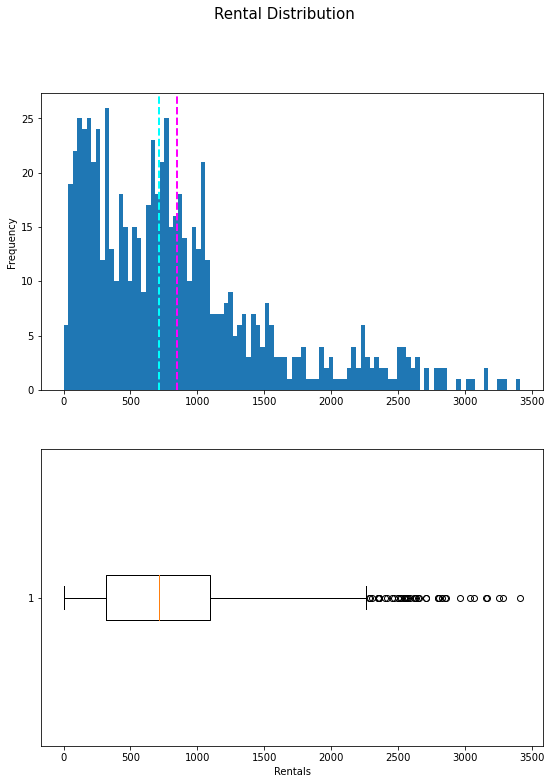

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution', fontsize = '15')


For skewed distributions, the direction of the skew indicates which way the longer tail extends.  
Our Target value shows the right-skewed distributions, the long tail extends to the right while most values cluster on the left. The box plot also helps to indicate the outliers.

### 2. Numeric features distribution

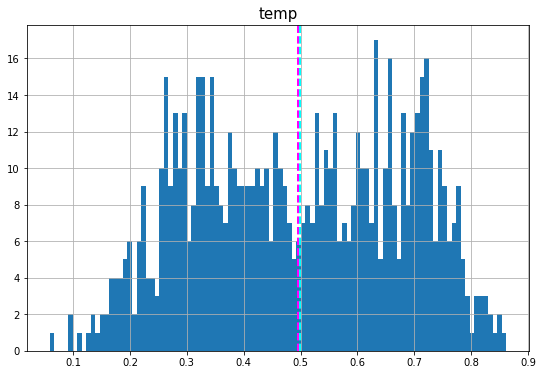

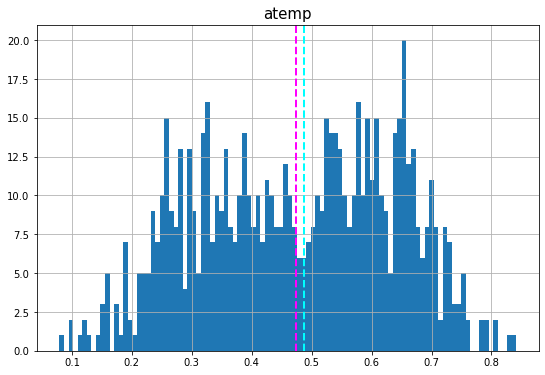

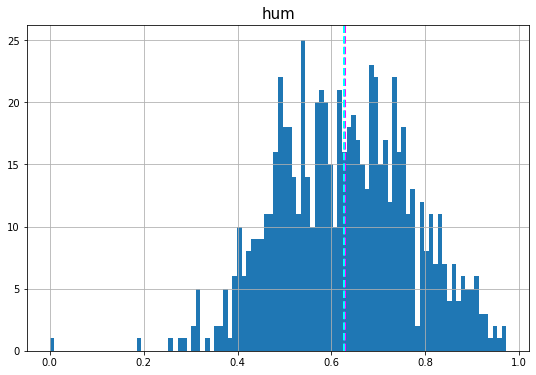

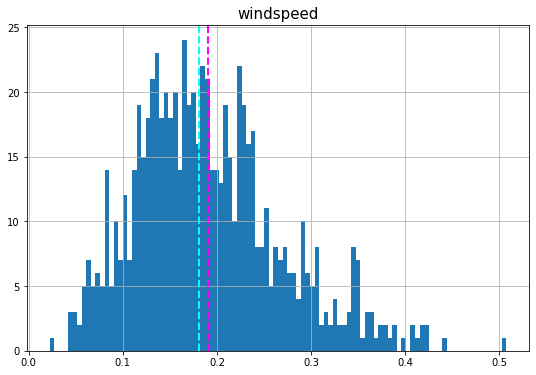

In [5]:
# Plot a histogram for each numeric feature (already normalized)

for col in numeric_features:
    
    fig = plt.figure(figsize=(9, 6))
    # The gca() method figure module of matplotlib library is used to get the current axes.
    ax = fig.gca()                 
    feature = bike_data[col]
    # features are already normalized, value between 0-1, set bin = 100
    feature.hist(bins = 100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col, fontsize = '15')
    
plt.show()

The data shows that basically, the two data of actual temperature (temp) and body temperature / ("feels-like") temperature (atemp) seem to be highly correlated, and there is not much difference between these two data.

In terms of humidity and wind speed, these two features show the opposite skewed distributions.

### 3. Numeric features and Label correlation

Text(0.5, 1.0, 'Correlation Heatmap')

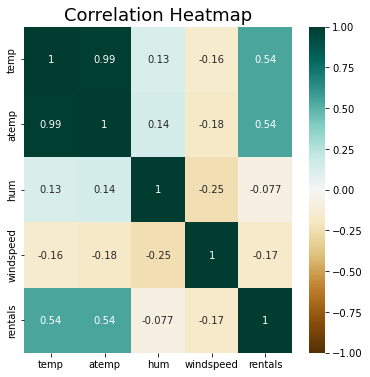

In [6]:
import seaborn as sns

plt.figure(figsize=(6, 6))
numeric_Rentals = ['temp', 'atemp', 'hum', 'windspeed','rentals']

# Take a look at the Correlation between rentals and Numeric features.
heatmap = sns.heatmap(bike_data[numeric_Rentals].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18})

### 4. Categorical features distribution

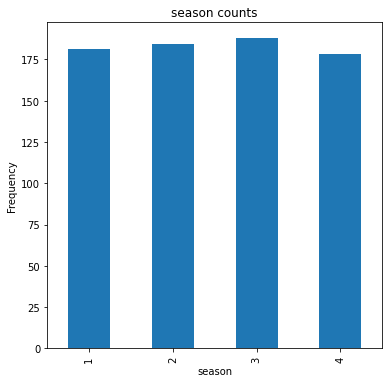

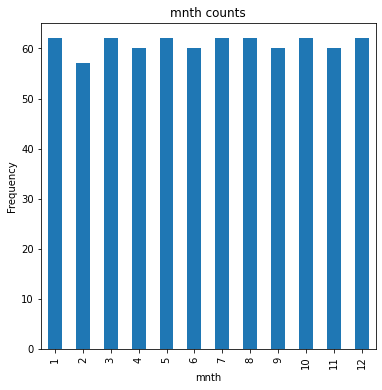

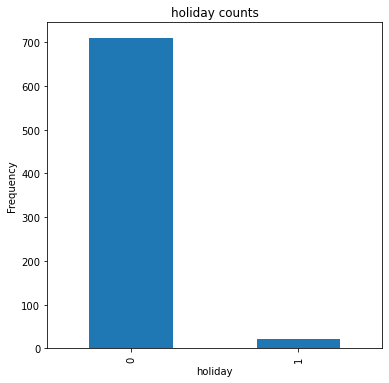

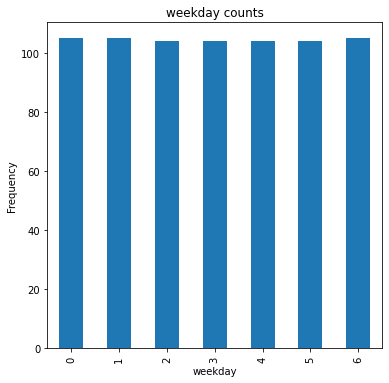

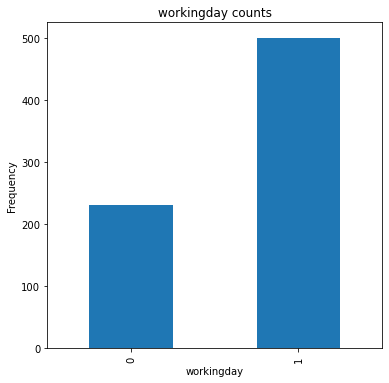

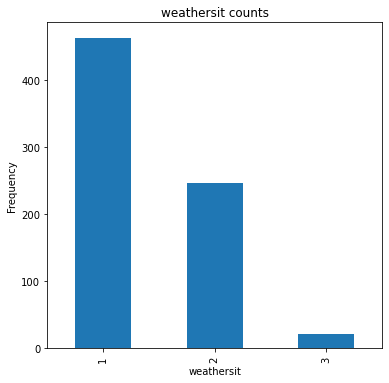

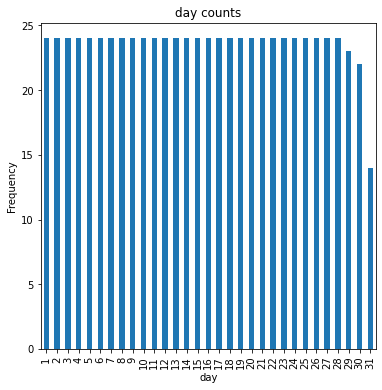

In [7]:
import numpy as np
import seaborn as sns
%matplotlib inline

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    
    # value_counts() function returns object containing counts of unique values, especially for qualitative variable
    # and result left column is called index
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    counts.plot.bar( ax = ax)
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
plt.show()

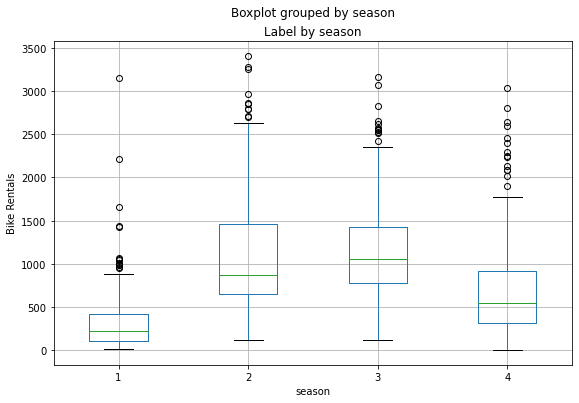

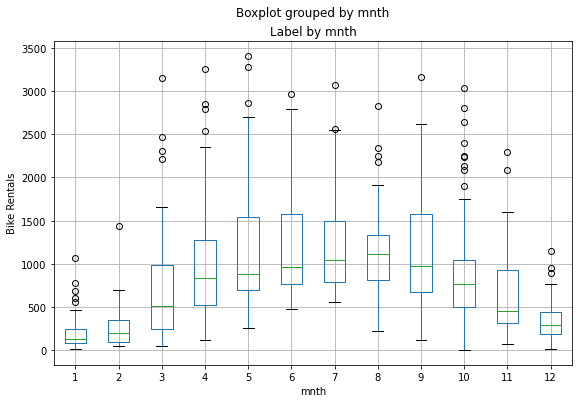

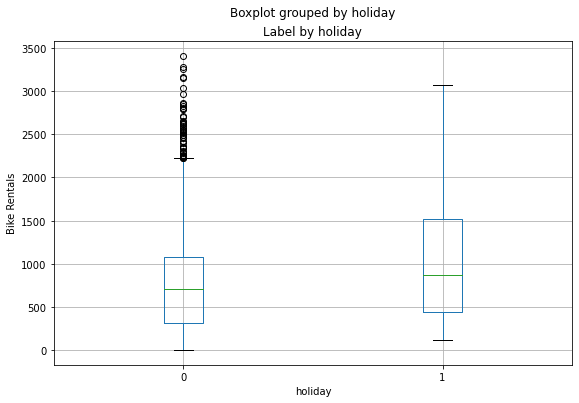

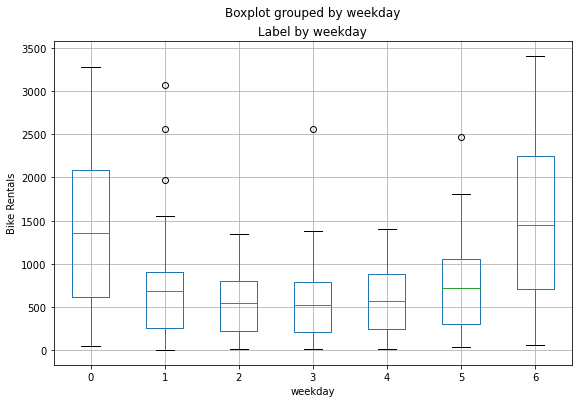

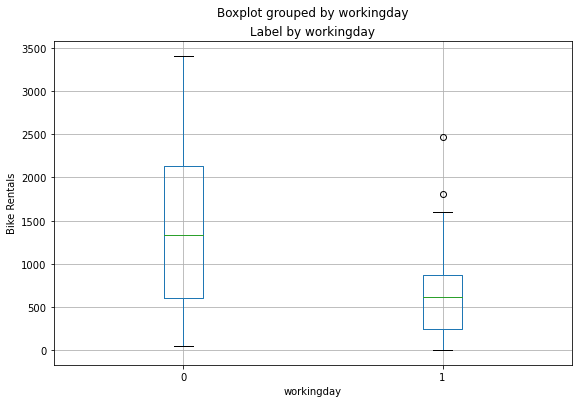

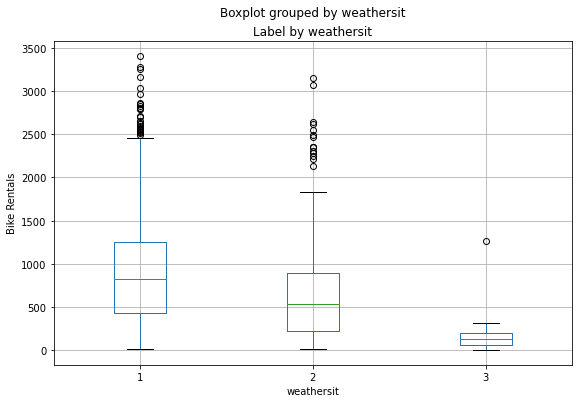

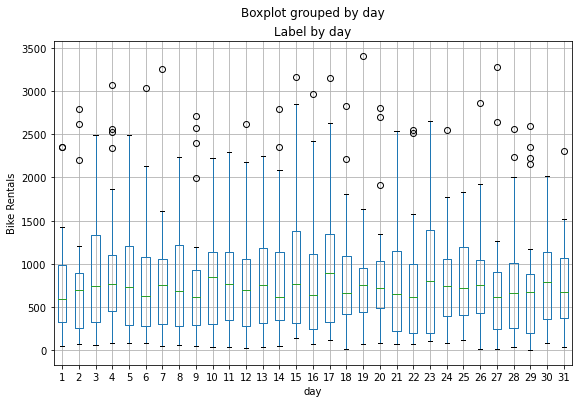

In [8]:
for col in categorical_features:
    
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

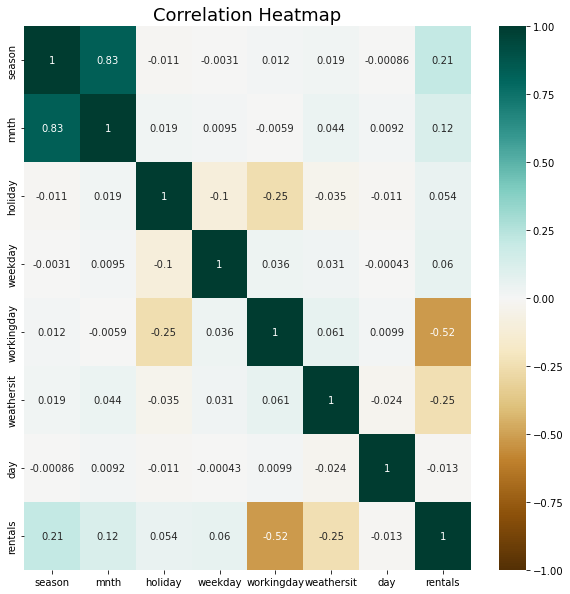

In [9]:
plt.figure(figsize=(10, 10))
categorical_Rentals = ['season','mnth','holiday','weekday','workingday','weathersit', 'day','rentals']

# Take a look at the Correlation between Rentals and categorical features.
heatmap = sns.heatmap(bike_data[categorical_Rentals].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18})

# Introduction to regression
### Regression mechanics
We want to fit a line to the data and a line in two dimensions is always of the form **y = m * x + b** ,  
**m (slope)** and **b(intercept)** are the parameters of the model that we want to learn.

How to verify the m and b?
A common method is to define an **error function** for any given line and then to choose the line that   
minimizes the error function. Such an error function is also called a **loss or a cost function**.

Because we want the line to be as close to the actual data points as possible.  
For this reason, we wish to minimize the vertical distance between the fit and the data.   
And this vertical distance is called a **residual**.  

In the loss function we try to **minimize the sum of the residuals**,  
then a large positive residual would cancel out a large negative residual,  
in the end we minimize the sum of the squares of the residuals!   

In the model we call this **ordinary least squares, or OLS** for short.  
OLS uses the mean (or sum) of square differences as a cost function. ( also the same as mean squared error)
https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/


Intercept: [-161.34611023]
Slope: [[2037.85542923]]


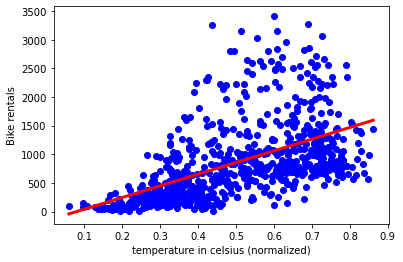

R^2: 0.29515822361912913
Root Mean Squared Error: 913.558754723987
Estimate Rental Count From Temperature: [[613.03895288]]


In [10]:
# choose one distinct X feature with target value
# for exemple, we choose temperature feature 

temp = bike_data['temp'].values
rentals = bike_data['rentals'].values

X_temp = temp.reshape(-1,1)   # keep data in one dimension
y = rentals.reshape(-1,1)

# plotting the original distribution of temperature vs. rentals
plt.scatter(X_temp, y, c ='b')
plt.ylabel('Bike rentals')
plt.xlabel('temperature in celsius (normalized)')

# Fitting the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

model = LinearRegression().fit(X_temp, y)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

# sort our original x point into 1 dimension
prediction_space = np.linspace(min(X_temp), max(X_temp)).reshape(-1, 1)

# here we will calculate the New y point use LinearRegression model
# ( y = mx + b) m=slope / b=intercept 
y_pred = model.predict(prediction_space)   

# plot the line
plt.plot(prediction_space, y_pred, c='r', linewidth=3)
plt.show()

print("R^2: {}".format(model.score(X_temp, y)))
rmse = np.sqrt(mean_squared_error(prediction_space, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


def estimate_rental(temperature):
    return temperature * model.coef_ + model.intercept_

print("Estimate Rental Count From Temperature:" ,estimate_rental(0.38))

# Train a Regression Model

In [11]:
# Separate features and labels

X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y = bike_data['rentals'].values

# After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels.

### K-fold cross-validation (Basic)
**By default, scikit-learn's cross_val_score() function uses R-Squared as the metric of choice for regression.**

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[ 0.34632319  0.12583192 -0.15197551  0.23290693  0.52446386]
Average 5-Fold CV Score: 0.21551007747598855


In [13]:
# split data into train and test data

from sklearn.model_selection import train_test_split
import sklearn
print("sklearn:",sklearn.__version__)

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0] , X_test.shape[0] ))

sklearn: 1.0.2
Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train: The feature values we'll use to train the model**  
- **y_train: The corresponding labels we'll use to train the model**  
- **X_test: The feature values we'll use to validate the model**  
- **y_test: The corresponding labels we'll use to validate the model**  

In [14]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the **training set**
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [15]:
import numpy as np

predictions = model.predict(X_test)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


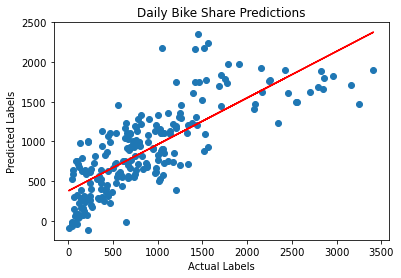

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# overlay the regression line
# m = slope, b = intercept
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m * y_test + b, color= 'r')

we can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

- **Mean Square Error (MSE):**   
The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE):**   
The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as R-squared or R2):**   
A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

**Always need to keep in mind, everything have it's limitation**  
R2 values are widely accepted but aren't a perfect measure we can use in isolation. They suffer four limitations:  
https://docs.microsoft.com/en-us/learn/modules/understand-regression-machine-learning/4-multiple-linear-regression

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2(between 0～1, The closer to 1 the better):", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2(between 0～1, The closer to 1 the better): 0.6040454736919191


## Preprocess the Data

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

In [19]:
# Define preprocessing for numeric columns (StandardScaler them)

numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)

categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cate', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cate',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 105506.15633383322
RMSE: 324.8171121320938
R2: 0.7931618024582157


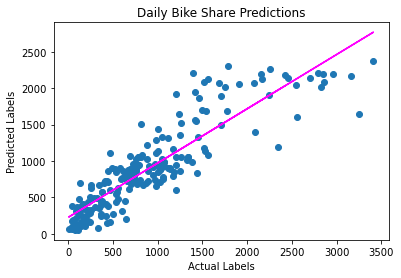

In [20]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [21]:
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

New_predictions = model.predict(X_new)

print('5-day rental predictions:')
for prediction in New_predictions:
    print(np.round(prediction))

5-day rental predictions:
493.0
929.0
428.0
472.0
491.0


## Extra
### Lasso for feature selection 

In [22]:
from sklearn.linear_model import Lasso
features = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].columns
lasso = Lasso(alpha = 0.2)
lasso_coef = lasso.fit(X, y).coef_

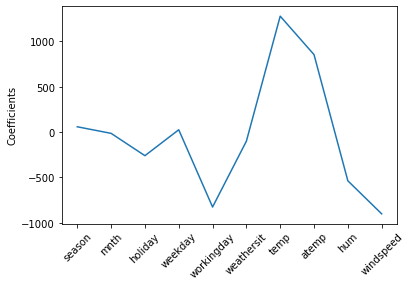

In [23]:
_ = plt.plot(range(len(features)), lasso_coef)
_ = plt.xticks(range(len(features)), features.values, rotation = 45)
_ = plt.ylabel("Coefficients")